In [2]:
!pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.3/321.3 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.0 MB/s eta 0:00:00


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from Bio import Entrez, SeqIO

In [10]:
def fetch_genome(accession_id: str) -> str:
    """
    Downloads a genome sequence from the NCBI database.
    """
    Entrez.email = "hajmohsenpiri@gmail.com"
    print(f"Fetching genome for accession ID: {accession_id}...")
    try:
        handle = Entrez.efetch(
            db="nucleotide", id=accession_id, rettype="fasta", retmode="text"
        )
        record = SeqIO.read(handle, "fasta")
        handle.close()
        print("Genome fetched successfully.")
        return str(record.seq)
    except Exception as e:
        print(f"An error occurred: {e}")
        return ""


In [11]:
def calculate_cumulative_gc_skew(sequence: str) -> np.ndarray:
    """
    Calculates the cumulative GC Skew for a DNA sequence.
    G is scored as +1, C as -1.
    """
    skew = np.zeros(len(sequence))
    for i, base in enumerate(sequence.upper()):
        if base == 'G':
            skew[i] = 1
        elif base == 'C':
            skew[i] = -1
    return np.cumsum(skew)

# 1. Get the genomic data

In [12]:
ecoli_accession_id = "NC_000913.3"

genome = fetch_genome(ecoli_accession_id)

Fetching genome for accession ID: NC_000913.3...
Genome fetched successfully.


# 2. Calculate the cumulative GC Skew and
# 3. Find the origin (minimum point) and terminus (maximum point)

In [13]:

cumulative_skew = calculate_cumulative_gc_skew(genome)


predicted_origin = np.argmin(cumulative_skew)
predicted_terminus = np.argmax(cumulative_skew)

print("\n--- Analysis Complete ---")
print(f"Genome Length: {len(genome):,} bp")
print(f"Predicted Replication Origin (oriC) at position: {predicted_origin:,}")
print(f"Predicted Replication Terminus (terC) at position: {predicted_terminus:,}")



--- Analysis Complete ---
Genome Length: 4,641,652 bp
Predicted Replication Origin (oriC) at position: 3,925,596
Predicted Replication Terminus (terC) at position: 1,552,388


# 4. Plot the results

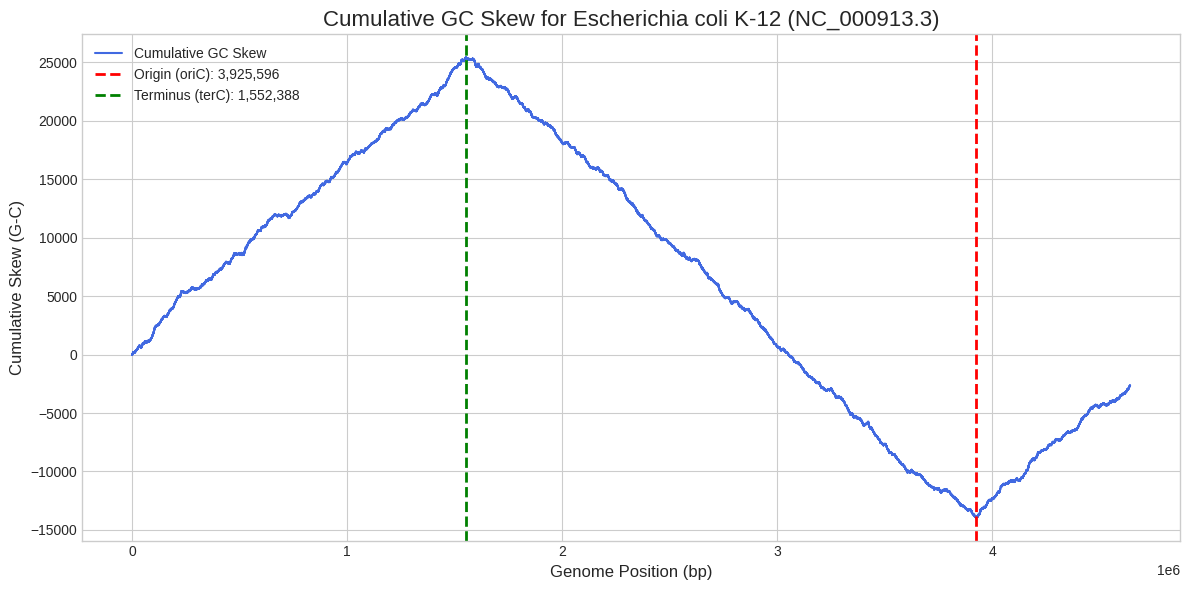

In [15]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 6))
plt.plot(cumulative_skew, color='royalblue', label='Cumulative GC Skew')

# Mark the origin and terminus
plt.axvline(x=predicted_origin, color='red', linestyle='--', linewidth=2, label=f'Origin (oriC): {predicted_origin:,}')
plt.axvline(x=predicted_terminus, color='green', linestyle='--', linewidth=2, label=f'Terminus (terC): {predicted_terminus:,}')

plt.title(f'Cumulative GC Skew for Escherichia coli K-12 ({ecoli_accession_id})', fontsize=16)
plt.xlabel('Genome Position (bp)', fontsize=12)
plt.ylabel('Cumulative Skew (G-C)', fontsize=12)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()